In [37]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii 
from astropy.io import fits
import pandas as pd
from scipy.optimize import curve_fit
import tensorflow as tf
from scipy import optimize

In [38]:
#write down the data in a readable format
data = [(1, "8:07", 6.57),
    (1, "15:37", -0.39),
    (2, "8:55", 5.38),
    (2, "16:25", -1.74),
    (3, "9:45", 5.26),
    (4, "10:35", -1.36),
    (4, "18:00", -1.15),
    (5, "11:28", 3.48),
    (5, "18:46", -1.61),
    (6, "12:22", 2.62),
    (6, "19:31", 0.05),
    (7, "13:24", 1.83),
    (7, "20:16", 1.01),
    (8, "3:22", 3.57),
    (8, "21:01", 0.73),
    (9, "4:07", 4.54),
    (9, "21:46", 2.17),
    (10, "4:50", 3.76),
    (10, "11:58", 2.88),
    (11, "5:31", 3.90),
    (11, "12:56", 1.92),
    (12, "6:08", 4.73),
    (12, "13:45", 1.74),
    (13, "6:47", 5.66),
    (13, "14:25", 0.79),
    (14, "7:22", 5.33),
    (14, "15:00", -0.04),
    (15, "7:59", 5.23),
    (15, "15:34", -1.12),
    (16, "8:34", 6.67),
    (16, "16:08", -0.61),
    (17, "9:10", 4.74),
    (17, "16:41", -0.93),
    (18, "9:45", 4.69),
    (18, "17:12", -1.29),
    (19, "10:21", 4.20),
    (19, "17:45", 0.22),
    (20, "10:57", 3.68),
    (20, "18:15", 0.26),
    (21, "11:38", 2.47),
    (21, "18:48", 0.36),
    (22, "12:25", 2.59),
    (22, "19:20", 0.99),
    (23, "2:22", 4.10),
    (23, "19:52", 1.87),
    (24, "2:58", 3.17),
    (24, "20:30", 1.60),
    (25,  "3:37", 3.71),
    (25, "10:44", 3.10),
    (26, "4:23", 4.04),
    (26, "11:55", 2.49),
    (27, "5:15", 4.07),
    (27, "12:57", 2.18),
    (28, "6:09", 5.93),
    (28, "13:50", 0.70),
    (29, "7:05", 6.89),
    (29, "14:39", 0.21),
    (30, "7:58", 6.72),
    (30, "15:27", 0.22),
    (31, "8:50", 6.77),
    (31, "16:10", -1.68),
    (32, "9:40", 5.77),
    (32, "16:52", -1.32),
    (33, "10:30", 4.35),
    (33, "17:34", -0.73),
    (34, "11:19", 4.23),
    (34, "18:12", -0.38),
    (35, "12:10", 2.24),
    (35, "18:49", -0.61),
    (36, "1:32", 3.45),
    (36, "19:24", -0.46),
    (37, "2:13", 4.13),
    (37, "20:00", 1.21),
    (38, "2:54", 3.34),
    (38, "9:54", 2.58),
    (39, "3:39", 3.32),
    (39, "11:15", 3.26),
    (40, "4:29", 5.21),
    (40, "12:22", 2.39),
    (41, "5:21", 4.83),
    (41, "13:14", 2.41),]

#change the time into minutes 
def convert(d, t_str):
    p = d *24
    h, m = map(int, t_str.split(':'))
    t = p + h
    return t * 60 + m

result = [(entry[0], convert(entry[0], entry[1]), entry[2]) for entry in data]

#print out the data

for entry in result:
    print(entry)

for entry in result:
    print(entry[1])

for entry in result:
    print(entry[2])





(1, 1927, 6.57)
(1, 2377, -0.39)
(2, 3415, 5.38)
(2, 3865, -1.74)
(3, 4905, 5.26)
(4, 6395, -1.36)
(4, 6840, -1.15)
(5, 7888, 3.48)
(5, 8326, -1.61)
(6, 9382, 2.62)
(6, 9811, 0.05)
(7, 10884, 1.83)
(7, 11296, 1.01)
(8, 11722, 3.57)
(8, 12781, 0.73)
(9, 13207, 4.54)
(9, 14266, 2.17)
(10, 14690, 3.76)
(10, 15118, 2.88)
(11, 16171, 3.9)
(11, 16616, 1.92)
(12, 17648, 4.73)
(12, 18105, 1.74)
(13, 19127, 5.66)
(13, 19585, 0.79)
(14, 20602, 5.33)
(14, 21060, -0.04)
(15, 22079, 5.23)
(15, 22534, -1.12)
(16, 23554, 6.67)
(16, 24008, -0.61)
(17, 25030, 4.74)
(17, 25481, -0.93)
(18, 26505, 4.69)
(18, 26952, -1.29)
(19, 27981, 4.2)
(19, 28425, 0.22)
(20, 29457, 3.68)
(20, 29895, 0.26)
(21, 30938, 2.47)
(21, 31368, 0.36)
(22, 32425, 2.59)
(22, 32840, 0.99)
(23, 33262, 4.1)
(23, 34312, 1.87)
(24, 34738, 3.17)
(24, 35790, 1.6)
(25, 36217, 3.71)
(25, 36644, 3.1)
(26, 37703, 4.04)
(26, 38155, 2.49)
(27, 39195, 4.07)
(27, 39657, 2.18)
(28, 40689, 5.93)
(28, 41150, 0.7)
(29, 42185, 6.89)
(29, 42639, 0.21

In [39]:
x_data = np.array([1927.0,2377.0,3415.0,3865.0,4905.0,6395.0,6840.0,7888.0,8326.0,9382.0,9811.0,10884.0,11296.0,11722.0,12781.0,13207.0,14266.0,14690.0,15118.0,16171.0,16616.0,17648.0,18105.0,19127.0,19585.0,20602.0,21060.0,22079.0,22534.0,23554.0,24008.0,25030.0,25481.0,26505.0,26952.0,27981.0,28425.0,29457.0,29895.0,30938.0,31368.0,32425.0,32840.0,33262.0,34312.0,34738.0,35790.0,36217.0,36644.0,37703,38155.0,39195.0,39657.0,40689.0,41150.0,42185.0,42639.0,43678.0,44127.0,45170.0,45610,46660.0,47092.0,48150.0,48574.0,49639.0,50052.0,51130.0,51529.0,51932.0,53004.0,53413,54480.0,54894.0,55314.0,56379.0,56835.0,57869.0,58342.0,59361.,59834.0])

y_data = np.array([6.57, -0.39, 5.38, -1.74, 5.26, -1.36, -1.15, 3.48, -1.61, 2.62, 0.05, 1.83, 1.01, 3.57, 0.73, 4.54, 2.17, 3.76, 2.88, 3.9, 1.92, 4.73, 1.74, 5.66, 0.79, 5.33, -0.04, 5.23, -1.12, 6.67, -0.61, 4.74, -0.93, 4.69, -1.29, 4.2, 0.22, 3.68, 0.26, 2.47, 0.36, 2.59, 0.99, 4.1, 1.87, 3.17, 1.6, 3.71, 3.1, 4.04, 2.49, 4.07, 2.18,  5.93, 0.7, 6.89, 0.21, 6.72, 0.22, 6.77, -1.68, 5.77, -1.32,  4.35, -0.73, 4.23, -0.38, 2.24, -0.61, 3.45, -0.46, 4.13, 1.21, 3.34, 2.58, 3.32, 3.26, 5.21, 2.39, 4.83, 2.41])




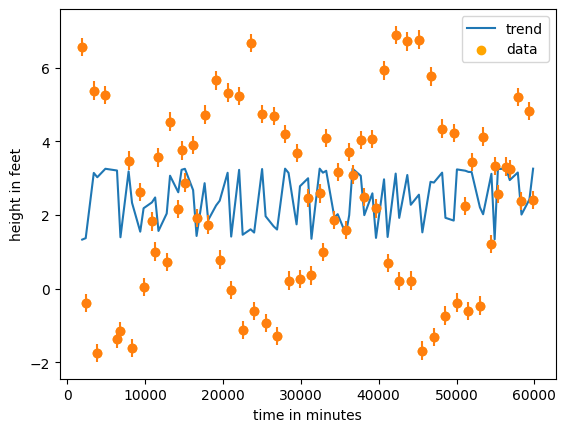

<Figure size 640x480 with 0 Axes>

In [40]:
def f_line(x, a, b, c, d):
    return a * np.sin(b * x + c) + d
init= (1, 42, 1, 1)
popt, pcov = optimize.curve_fit(f_line, x_data, y_data, p0 = init)

y_fit = f_line(x_data, *popt)

af= popt[0]
bf= popt[1]
cf= popt[2]
df= popt[3]

plt.plot(x_data, f_line(x_data, *popt), label = "trend")
y_err=0.25
plt.scatter(x_data,y_data, label='data', color='orange')
plt.xlabel('time in minutes')
plt.ylabel('height in feet')
plt.errorbar(x_data,y_data, yerr = y_err, fmt='o')
plt.legend()
plt.show()
plt.savefig("fit.pdf", bbox_inches="tight", dpi= 600)





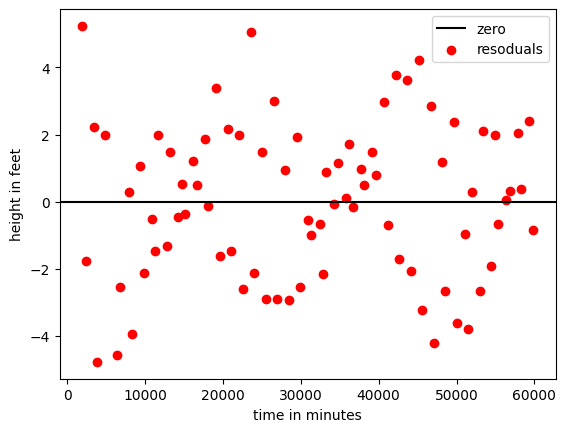

In [41]:
residuals = y_data - y_fit

plt.axhline(y=0, linestyle='-', label='zero', color='black')
plt.scatter(x_data, residuals, label='resoduals', color='red')
plt.xlabel("time in minutes")
plt.ylabel("height in feet")
plt.legend()

2.2850359741319943


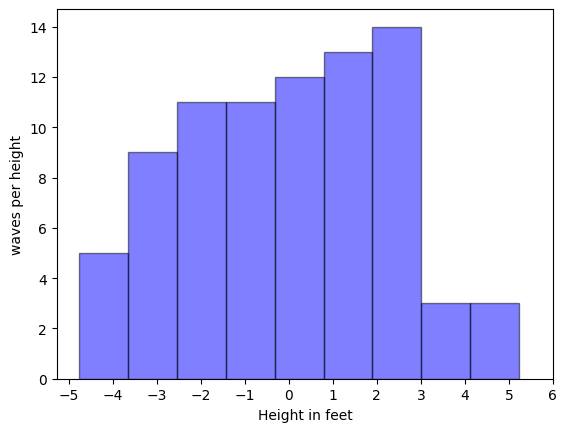

In [122]:
s = int(np.floor(np.sqrt(82)))


plt.hist(residuals, label='residuals', bins = s, alpha = 0.5, color = 'blue', edgecolor='black')
plt.xlabel('Height in Feet')
plt.ylabel('Waves per Height')
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
plt.tick_params(axis='both', which = 'minor')
std = np.std(residuals)
print(std)
plt.savefig('histogram.pdf',bbox_inches='tight', dpi=600)
